# Q2

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(100000)

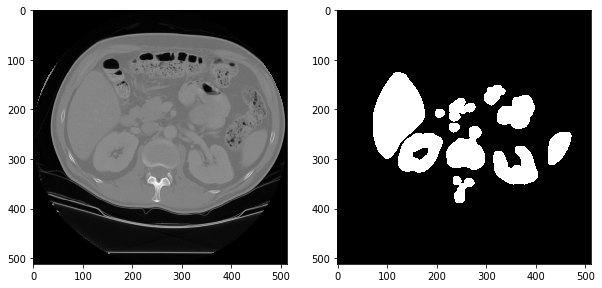

In [3]:
im = cv2.imread('../input_data/kidney.jpg', 0)

ind = np.where(im > 128)
thresh = np.zeros(im.shape)
thresh[ind] = 1

kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(16,16))

open_im = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel1)

kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))

close_im = cv2.morphologyEx(open_im, cv2.MORPH_CLOSE, kernel2)

kernel  = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.imshow(close_im, cmap='gray')
plt.show()


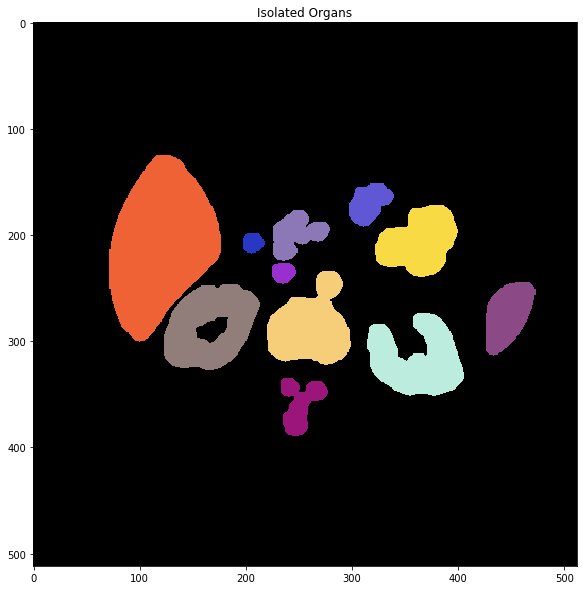

In [6]:
def dfs(x, y, im, out, visited, color):
    if(x<0 or x>=im.shape[0]):  
        return 0
    if(y<0 or y>=im.shape[1]):
        return 0
    if (visited[x,y]==1):
        return 0
    visited[x,y] = 1
    
    if(im[x,y] == 1):
        out[x,y] = color
        dfs(x+1, y, im, out, visited, color)
        dfs(x, y+1, im, out, visited, color)
        dfs(x, y-1, im, out, visited, color)
        dfs(x-1, y, im, out, visited, color)  
    
    return 0

def colored(im):
    h, w =im.shape
    out = np.zeros((h, w, 3), dtype = np.uint16)
    visited = np.zeros(im.shape)
    
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if(visited[i,j]==0 and im[i,j]==1):
                dfs(i, j, im, out, visited, list(np.random.choice(range(256), size=3)))
    
    return out

plt.figure(figsize=(10,10))
out = colored(close_im)
plt.imshow(out)
plt.title("Isolated Organs")
plt.show()